# Keras Softmax Classifier
    Jared Nielsen

In [ ]:
# import sys
# !{sys.executable} -m pip install keras

In [39]:
import keras
from keras.datasets import fashion_mnist
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import sklearn
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sys

# Multi-Class Logistic Regression on Scikit-Learn Digits

<Figure size 432x288 with 0 Axes>

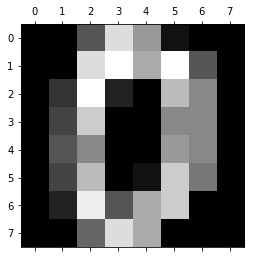

In [47]:
# digits is a dictionary with keys `data`, `images`, `target`, `target_names`, `DESCR`.
digits = load_digits(n_class=10, return_X_y=False) 
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

plt.gray()
plt.matshow(digits.images[0])
plt.show()

In [65]:
def build_logistic_model(penalty, C):
    regr = LogisticRegression(penalty=penalty, C=C, multi_class='ovr', solver='liblinear')
    results = regr.fit(X_train, y_train)
    regr.coef_.shape
    y_train_hat = regr.predict(X_train)
    y_test_hat = regr.predict(X_test)
    acc_train = (y_train_hat == y_train).mean()
    acc_test = (y_test_hat == y_test).mean()
    return acc_test, acc_train

# C is inverse regularization parameter; smaller values are stronger regularization
Cs = [10**k for k in range(-3, 3)]
for C in Cs:
    for penalty in 'l1', 'l2':
        acc_test, acc_train = build_logistic_model(penalty, C)
        print("penalty: {}, C: {}, Test Acc: {:.3f}, Train Acc: {:.3f}".format(
                penalty, C, acc_test, acc_train))
    print()

penalty: l1, C: 0.001, Test Acc: 0.767, Train Acc: 0.767
penalty: l2, C: 0.001, Test Acc: 0.957, Train Acc: 0.960

penalty: l1, C: 0.01, Test Acc: 0.941, Train Acc: 0.940
penalty: l2, C: 0.01, Test Acc: 0.978, Train Acc: 0.980

penalty: l1, C: 0.1, Test Acc: 0.976, Train Acc: 0.979
penalty: l2, C: 0.1, Test Acc: 0.969, Train Acc: 0.994

penalty: l1, C: 1, Test Acc: 0.970, Train Acc: 0.997
penalty: l2, C: 1, Test Acc: 0.965, Train Acc: 0.997

penalty: l1, C: 10, Test Acc: 0.959, Train Acc: 0.998
penalty: l2, C: 10, Test Acc: 0.959, Train Acc: 0.998

penalty: l1, C: 100, Test Acc: 0.946, Train Acc: 0.999
penalty: l2, C: 100, Test Acc: 0.944, Train Acc: 0.999



An L2 penalty with C-value 0.01 gives the best test set performance.

# Fashion-MNIST Keras Classifier

In [67]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

input_dim = 784
output_dim = 10

X_train = X_train.reshape(60000, input_dim).astype(np.float32)
X_test = X_test.reshape(10000, input_dim).astype(np.float32)

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [85]:
n_epochs = 2
batch_size = 128

def train_fashionmnist_model(n_epochs, batch_size):
    model = Sequential()
    model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=n_epochs, verbose=0, 
             validation_data=(X_test, Y_test))
    val_acc = history.history['val_acc']
    return val_acc
    
result = train_fashionmnist_model(n_epochs=2, batch_size=128)

In [77]:
result.history['val_acc'][-1]

[0.3876, 0.3899]

In [86]:
n_epochs_list = [1, 5, 10, 20]
batch_size_list = [32, 64, 128, 256]
max_epochs = max(n_epochs_list)

for batch_size in batch_size_list:
    val_acc = train_fashionmnist_model(max_epochs, batch_size)
    for n_epoch in n_epochs_list:
        acc = val_acc[n_epoch-1]
        print("Batch size {}, n_epochs {} - test acc: {:.3f}".format(batch_size, n_epoch, acc))

Batch size 32, n_epochs 1 - test acc: 0.282
Batch size 32, n_epochs 5 - test acc: 0.286
Batch size 32, n_epochs 10 - test acc: 0.364
Batch size 32, n_epochs 20 - test acc: 0.367
Batch size 128, n_epochs 1 - test acc: 0.363
Batch size 128, n_epochs 5 - test acc: 0.474
Batch size 128, n_epochs 10 - test acc: 0.478
Batch size 128, n_epochs 20 - test acc: 0.491
Batch size 256, n_epochs 1 - test acc: 0.199
Batch size 256, n_epochs 5 - test acc: 0.200
Batch size 256, n_epochs 10 - test acc: 0.200
Batch size 256, n_epochs 20 - test acc: 0.199


Batch size 128, n_epochs 20 gives the best training accuracy. Also, we should definitely use the Adam optimizer.

### Problem 6 can be seen on [my Github](https://github.com/jarednielsen/cryopumps/blob/master/feature-engineering.ipynb). Scroll down to the bottom - TurboNet is a 1-D CNN used to predict cryogenic semiconductor pump id from their motor speeds.